# This is a simulation of the afterpulsing effect within PMT tubes. Technically, a simulation of this nature could be used to help quantify and predict error in particularly sensitive PMT testing results when measuring low-level signals.

[0.5397821769894, 0.48128558, 0.45202596, 0.43575968, 0.36728558, 0.31295660000000003]
3500
prior to mp 169
main pulse 171
prior to first pulse 214
first pulse 216
after first 355
2nd pulse 357
after second 522
3rd pulse 524
after 3rd 1396
4th pulse 1398
after 4th 2398
5th pulse 2400
after 3092
6th pulse 3094
after 4th 3500


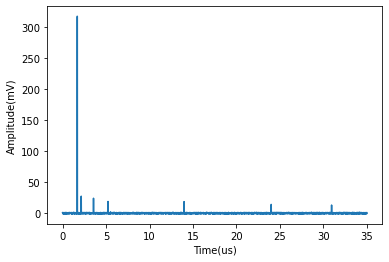

-765.7615732779958 200000.0


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy as sp
from scipy import stats
import random


###########VARIABLE DATA###########

mp_charge = 380
pulses = range(0,50)
PMT_accuracy = 0.3
prob = [mp_charge*0.00142047941313, mp_charge*0.001266541, mp_charge*0.001189542, mp_charge*0.001146736, mp_charge*0.000966541, mp_charge*0.000823570]
avg_pulse_amps = [.072, .060, .042, .041,.038, .049]

###########VARIABLE DATA###########
print(prob)


PE_Data = False
first_pulse = False


t_us = np.linspace(0,35,3500)
print(len(t_us))

background = []
waveform = []


#first_pulse_timing = int(len(t_us) / )

############## Build background
for i in range(0,len(t_us)): 
        n = random.uniform(-1, 1)*PMT_accuracy*mp_charge/100
        background.append(n)
for i in range(0,len(background)): #add random background pulses,
        val = mp_charge*avg_pulse_amps[3] #background larger pulses amplitude not to generally exceed APs
        r = random.uniform(-1, 1)
        if abs(r) < .02: #thermal noise
            background[i] = background[i]+val*r
for i in range(0,len(background)): 
        val = mp_charge*avg_pulse_amps[3]
        r = random.random()
        if abs(r) < .004: #atmospheric noise
            background[i] = background[i]+val*10*r
for i in range(0,len(background)): 
        val = mp_charge*avg_pulse_amps[3]
        r = random.random()
        if abs(r) < .001: #nearby electrical devices
            background[i] = background[i]+val*100*r
    

############### Build Waveform

#prior to mp, background
for j in range(0,169):
    waveform.append(background[j])
print('prior to mp',len(waveform))

#main pulse
mp_rand = random.uniform(0.70, 1) #extra variance of main pulse 
for k in range(169,171):
        waveform.append(background[k]+mp_charge*mp_rand)
print('main pulse',len(waveform))

#prior to first pulse, background
for l in range(171,214):
    waveform.append(background[l])
print('prior to first pulse', len(waveform))

#first pulse, generally not considered to be derived from ionized gasses
first_pulse_rand = random.uniform(.9, 1.1)
for m in range(214,216):
    randomizer_1st_pulse = random.random()
    if randomizer_1st_pulse <= prob[0]: #chance of a 1st pulse exceeds the probability
        waveform.append(background[m]+mp_charge*avg_pulse_amps[0]*first_pulse_rand)
    else:
        waveform.append(background[m])
print('first pulse', len(waveform))

#after first pulse
for n in range(216,355):
    waveform.append(background[n])
print('after first',len(waveform))

#2nd pulse, Probably Helium
second_pulse_rand = random.uniform(0.76, 1.2)
for m in range(355,357):
    randomizer_2nd_pulse = random.random()
    if randomizer_2nd_pulse <= prob[1]:
        waveform.append(mp_charge*avg_pulse_amps[1]*second_pulse_rand)
    else:
        waveform.append(background[m])
print('2nd pulse', len(waveform))

#after second pulse
for n in range(357,522):
    waveform.append(background[n])
print('after second',len(waveform))

#3rd pulse
third_pulse_rand = random.uniform(0.76, 1.2)
for m in range(522,524):
    randomizer_3rd_pulse = random.random()
    if randomizer_3rd_pulse <= prob[2]:
        waveform.append(mp_charge*avg_pulse_amps[2]*third_pulse_rand)
    else:
        waveform.append(background[m])
print('3rd pulse', len(waveform))

#after 3rd pulse
for n in range(524, 1396):
    waveform.append(background[n])
print('after 3rd',len(waveform))


#4th pulse
fourth_pulse_rand = random.uniform(0.76, 1.2)
for m in range(1396,1398):
    randomizer_4th_pulse = random.random()
    if randomizer_4th_pulse <= prob[3]:
        waveform.append(mp_charge*avg_pulse_amps[3]*fourth_pulse_rand)
    else:
        waveform.append(background[m])
print('4th pulse', len(waveform))

#after 4th pulse
for n in range(1398, 2398):
    waveform.append(background[n])
print('after 4th',len(waveform))

#5th pulse
fifth_pulse_rand = random.uniform(0.76, 1.2)
for m in range(2398,2400):
    randomizer_5th_pulse = random.random()
    if randomizer_5th_pulse <= prob[4]:
        waveform.append(mp_charge*avg_pulse_amps[4]*fifth_pulse_rand)
    else:
        waveform.append(background[m])
print('5th pulse', len(waveform))

for n in range(2400,3092):
    waveform.append(background[n])
print('after',len(waveform))

    #randomizer = random.random()
    #print(randomizer)
    
#6th pulse
sixth_pulse_rand = random.uniform(0.76, 1.2)
for m in range(3092,3094):
    randomizer_6th_pulse = random.random()
    if randomizer_6th_pulse <= prob[4]:
        waveform.append(mp_charge*avg_pulse_amps[4]*sixth_pulse_rand)
    else:
        waveform.append(background[m])
print('6th pulse', len(waveform))

#after 4th pulse
for n in range(3094, 3500):
    waveform.append(background[n])
print('after 4th',len(waveform))


plt.plot(t_us,waveform)
#plt.ylim(-1.2,1.5)
plt.xlabel('Time(us)')
plt.ylabel('Amplitude(mV)')
plt.show()


# These pulses consist of too few photons to be seen by the human eye, however with the help of python, we can simulate what that might look like if we had super-vision

In [ ]:
normed_amps = [float(abs(i))/max(waveform)*300000 for i in waveform]
print(min(normed_amps), max(normed_amps))

#from matplotlib.animation import FFMpegWriter
#metadata = dict(title='Afterpulsing_Simulation', artist='Ashley Rincon',comment='"light pulses".')
#writer = FFMpegWriter(fps=15, metadata=metadata)

%matplotlib qt
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 6))

#with writer.saving(fig, "wave1d.mp4", dpi=200):
for i in range(120,len(waveform)):
    ax2.cla()
    ax1.cla()
    ax2.scatter( 0 , 0 , s = normed_amps[i], color = 'white')
    ax2.set_xlim( -1 , 1 )
    ax2.set_ylim( -1 , 1 )
    ax2.set_title( 'Simulated "light" pulses' )
    ax2.set_facecolor('black')
    ax2.set_xticks([]) 
    ax2.set_yticks([])
    x = range(0,i)
    ax1.set_xlim(-2,len(waveform))
    ax1.set_ylim(-5,max(waveform)+5)
    ax1.plot(x,waveform[:i],'k')
    ax1.set_xlabel('Time (0.1 us)')
    ax1.set_ylabel('Amplitude (mV)')
    ax1.set_facecolor('white')
    plt.draw()
    plt.pause(0.00001)
    #writer.grab_frame()
    plt.show()